# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to track and compare market capitalisation of the top global banks toevaluate competitiveness and dominance.</br>
            5.2 Suggestions to use cross-currency analysis (USD, GBP, EUR, INR) for consistent benchmarking
of financial institutions across regions.</br>
            5.3 Propose continuous monitoring of market share concentration to identify growth opportunities
for mid-tier banks.</br>
            5.4  Identify potential regions or banking segments for expansion by analysing gaps between tiers
of banks and regional trends.</br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [ ]:
# # Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull

In [ ]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [ ]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()
# URL of the Wikipedia page
url = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"

# Use pandas to read all HTML tables from the page
tables = pd.read_html(url)
print(f"Total number of tables scraped: {len(tables)}")
df0 = tables[0]
df1 = tables[1]
df2 = tables[2]
df3 = tables[3]

# Load the correct table (Table 1)
df = tables[1]
print(f'The Table[1] Data Frame has {df.shape[0]} rows and {df.shape[1]} columns')

# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Rename columns
spark_df = spark_df.withColumnRenamed("Rank", "Rank") \
                   .withColumnRenamed("Bank name", "Bank_name") \
                   .withColumnRenamed("Market cap (US$ billion)", "Market_Cap_USD_billion")

# Show the first few rows of the PySp
ark DataFrame
spark_df.show()

# Print the schema of the DataFrame
spark_df.printSchema()

# Configure logging
import logging
from datetime import datetime

def log_progress(message):
    """Logs the progress of the script."""
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    log_message = f"{timestamp} : {message}"
    print(log_message)
    with open("code_log.txt", 'a') as f:
        f.write(log_message + '\n')
log_progress("Data Loaded and Processed")

Total number of tables scraped: 4
The Table[1] Data Frame has 10 rows and 3 columns
+----+--------------------+----------------------+
|Rank|           Bank_name|Market_Cap_USD_billion|
+----+--------------------+----------------------+
|   1|      JPMorgan Chase|                432.92|
|   2|     Bank of America|                231.52|
|   3|Industrial and Co...|                194.56|
|   4|Agricultural Bank...|                160.68|
|   5|           HDFC Bank|                157.91|
|   6|         Wells Fargo|                155.87|
|   7|   HSBC Holdings PLC|                 148.9|
|   8|      Morgan Stanley|                140.83|
|   9|China Constructio...|                139.82|
|  10|       Bank of China|                136.81|
+----+--------------------+----------------------+

root
 |-- Rank: long (nullable = true)
 |-- Bank_name: string (nullable = true)
 |-- Market_Cap_USD_billion: double (nullable = true)

2025-Nov-25-05:57:11 : Data Loaded and Processed


In [ ]:
print(f"Total number of tables scraped: {len(tables)}")
log_progress(f"Total number of tables scraped: {len(tables)}")

Total number of tables scraped: 4
2025-Nov-25-06:18:39 : Total number of tables scraped: 4


In [ ]:
display(df0)
display(df1)
display(df2)
display(df3)
log_progress("displaying all 4 dfs - df0, df1, df2, df3")

,0,1,2
0,Aug,SEP,Oct
1,NaN,08,NaN
2,2022,2023,2024


,Rank,Bank name,Market cap (US$ billion)
0,1,JPMorgan Chase,432.92
1,2,Bank of America,231.52
2,3,Industrial and Commercial Bank of China,194.56
3,4,Agricultural Bank of China,160.68
4,5,HDFC Bank,157.91
5,6,Wells Fargo,155.87
6,7,HSBC Holdings PLC,148.90
7,8,Morgan Stanley,140.83
8,9,China Construction Bank,139.82
9,10,Bank of China,136.81


,Rank,Bank name,Total assets (2022) (US$ billion)
0,1,Industrial and Commercial Bank of China Limited,5742.86
1,2,China Construction Bank,5016.81
2,3,Agricultural Bank of China,4919.03
3,4,Bank of China,4192.12
4,5,JPMorgan Chase,3868.24
...,...,...,...
95,96,National Bank of Canada,312.67
96,97,Macquarie Group,313.47
97,98,Nationwide Building Society,311.93
98,99,Raiffeisen Gruppe,303.50


,Rank,Country,Number
0,1,China,20
1,2,United States,11
2,3,Japan,8
3,4,United Kingdom,6
4,4,France,6
5,4,Canada,6
6,4,South Korea,6
7,8,Australia,5
8,9,Germany,4
9,10,Spain,3


2025-Nov-25-06:18:42 : displaying all 4 dfs - df0, df1, df2, df3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      10 non-null     int64  
 1   Bank name                 10 non-null     object 
 2   Market cap (US$ billion)  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


Load the data for exchange rates

In [ ]:
# Load the exchange rate data
from google.colab import drive
drive.mount('/content/drive')
exchange_rate_df = spark.read.csv("/content/drive/MyDrive/Assignment 2/exchange_rate.csv", header=True, inferSchema=True)

# Show the first few rows of the exchange rate data to verify
exchange_rate_df.show()

log_progress("Exchange Rate Data Loaded")

Mounted at /content/drive
+--------+-----+
|Currency| Rate|
+--------+-----+
|     EUR| 0.93|
|     GBP|  0.8|
|     INR|82.95|
+--------+-----+

2025-Nov-25-06:20:18 : Exchange Rate Data Loaded


#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [ ]:
# Print the schema to check data types
spark_df.printSchema()

root
 |-- Rank: long (nullable = true)
 |-- Bank_name: string (nullable = true)
 |-- Market_Cap_USD_billion: double (nullable = true)



In [ ]:
# Check for missing values
spark_df.select([count(when(isnull(c), c)).alias(c) for c in spark_df.columns]).show()

+----+---------+----------------------+
|Rank|Bank_name|Market_Cap_USD_billion|
+----+---------+----------------------+
|   0|        0|                     0|
+----+---------+----------------------+



In [ ]:
# Drop rows with missing values
columns = spark_df.columns
for column_name in columns:
    null_count = spark_df.filter(col(column_name).isNull()).count()
    print(f"Column '{column_name}': {null_count} missing values")
log_progress("Counted Null values in each column")
spark_df_cleaned = spark_df.dropna()
# Show the number of rows before and after dropping
print(f"Number of rows before dropping missing values: {spark_df.count()}")
print(f"Number of rows after dropping missing values: {spark_df_cleaned.count()}")

log_progress("Dropped rows with missing values")

Column 'Rank': 0 missing values
Column 'Bank_name': 0 missing values
Column 'Market_Cap_USD_billion': 0 missing values
2025-Nov-25-06:21:20 : Counted Null values in each column
Number of rows before dropping missing values: 10
Number of rows after dropping missing values: 10
2025-Nov-25-06:21:21 : Dropped rows with missing values


##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [ ]:
# Count the total number of rows
total_rows = spark_df_cleaned.count()
print(f"Total number of rows: {total_rows}")
log_progress(f"Total number of rows: {total_rows}")

# Check if there are duplicates
duplicate_rows = spark_df_cleaned.groupBy(spark_df_cleaned.columns).count().filter("count > 1")
num_duplicates = duplicate_rows.count()
print(f"Number of duplicate rows: {num_duplicates}")
log_progress(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    print("Duplicate rows found:")
    duplicate_rows.show()
else:
    print("No duplicate rows found.")

Total number of rows: 10
2025-Nov-25-06:21:37 : Total number of rows: 10
Number of duplicate rows: 0
2025-Nov-25-06:21:38 : Number of duplicate rows: 0
No duplicate rows found.


##**2.2 Handle Outliers** <font color = red>[5 marks]</font> <br>


In [ ]:
# Write code for outlier analysis
q1 = spark_df_cleaned.approxQuantile("Market_Cap_USD_billion", [0.25], 0.0)[0]
q3 = spark_df_cleaned.approxQuantile("Market_Cap_USD_billion", [0.75], 0.0)[0]
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = spark_df_cleaned.filter(
    (col("Market_Cap_USD_billion") < lower_bound) |
    (col("Market_Cap_USD_billion") > upper_bound)
)
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Interquartile Range): {iqr}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print("\nPotential Outliers based on Market Cap (US$ Billion):")
outliers.show()

log_progress("Outlier analysis performed")

Q1 (25th percentile): 140.83
Q3 (75th percentile): 194.56
IQR (Interquartile Range): 53.72999999999999
Lower Bound for Outliers: 60.23500000000003
Upper Bound for Outliers: 275.155

Potential Outliers based on Market Cap (US$ Billion):
+----+--------------+----------------------+
|Rank|     Bank_name|Market_Cap_USD_billion|
+----+--------------+----------------------+
|   1|JPMorgan Chase|                432.92|
+----+--------------+----------------------+

2025-Nov-25-06:21:42 : Outlier analysis performed


Saving the Cleaned Dataset into a CSV File into the S3 Bucket


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [ ]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = spark_df_cleaned.toPandas()

log_progress("Converted PySpark DataFrame to Pandas DataFrame")
display(pandas_df.head())
pandas_df.info()

2025-Nov-25-06:21:44 : Converted PySpark DataFrame to Pandas DataFrame


,Rank,Bank_name,Market_Cap_USD_billion
0,1,JPMorgan Chase,432.92
1,2,Bank of America,231.52
2,3,Industrial and Commercial Bank of China,194.56
3,4,Agricultural Bank of China,160.68
4,5,HDFC Bank,157.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    10 non-null     int64  
 1   Bank_name               10 non-null     object 
 2   Market_Cap_USD_billion  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

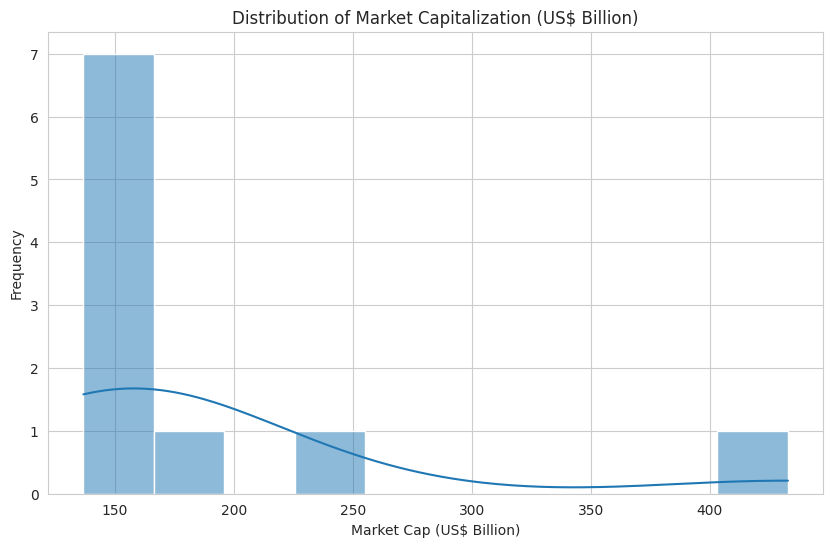

2025-Nov-25-06:23:47 : Plotted distribution of Market Cap


In [ ]:
# Distribution of Market Cap (US$ Billion)

# Set the style for seaborn
sns.set_style("whitegrid")

# Plot the distribution of market cap
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['Market_Cap_USD_billion'], kde=True, bins=10)
plt.title('Distribution of Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.ylabel('Frequency')
plt.show()

log_progress("Plotted distribution of Market Cap")

##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

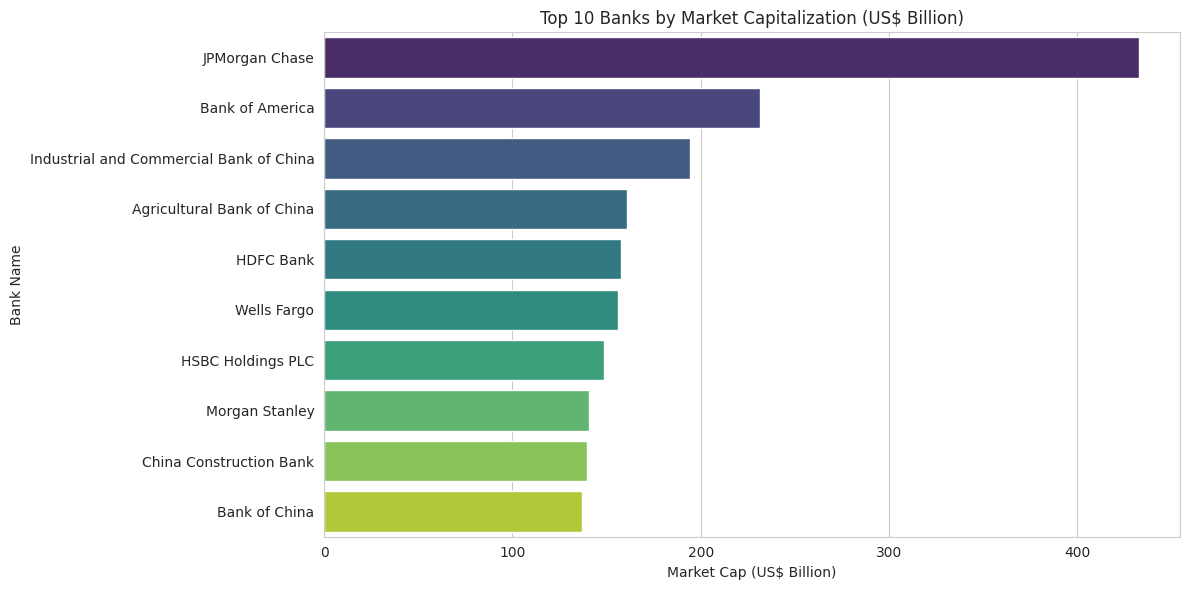

2025-Nov-25-06:23:49 : Plotted Top 10 Banks by Market Cap


In [ ]:
# Top 10 Banks by Market Cap

# Sort the DataFrame by market cap in descending order
top_10_banks = pandas_df.sort_values(by='Market_Cap_USD_billion', ascending=False).head(10)

# Plot the top 10 banks by market cap
plt.figure(figsize=(12, 6))
sns.barplot(x='Market_Cap_USD_billion', y='Bank_name', data=top_10_banks, palette='viridis', hue='Bank_name', legend=False)
plt.title('Top 10 Banks by Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.ylabel('Bank Name')
plt.tight_layout()
plt.show()

log_progress("Plotted Top 10 Banks by Market Cap")

##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

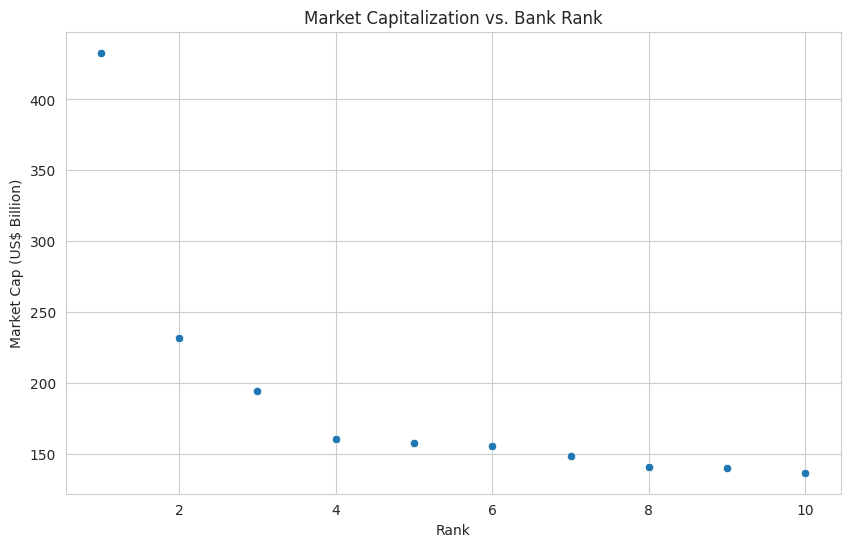

2025-Nov-25-06:23:52 : Plotted Market Cap vs Rank


In [ ]:
# Market Cap vs Rank

# Plot market cap vs rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Market_Cap_USD_billion', data=pandas_df)
plt.title('Market Capitalization vs. Bank Rank')
plt.xlabel('Rank')
plt.ylabel('Market Cap (US$ Billion)')
plt.show()

log_progress("Plotted Market Cap vs Rank")

##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

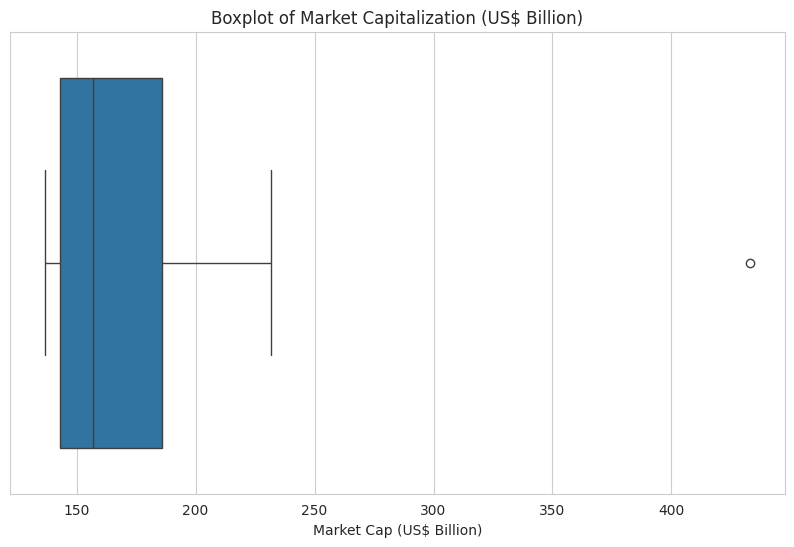

2025-Nov-25-06:24:06 : Plotted Boxplot of Market Cap


In [ ]:
# Boxplot of Market Cap
#To show the spread and outliers in the market capitalization data.

# Plot a boxplot of market cap
plt.figure(figsize=(10, 6))
sns.boxplot(x=pandas_df['Market_Cap_USD_billion'])
plt.title('Boxplot of Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.show()

log_progress("Plotted Boxplot of Market Cap")

##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

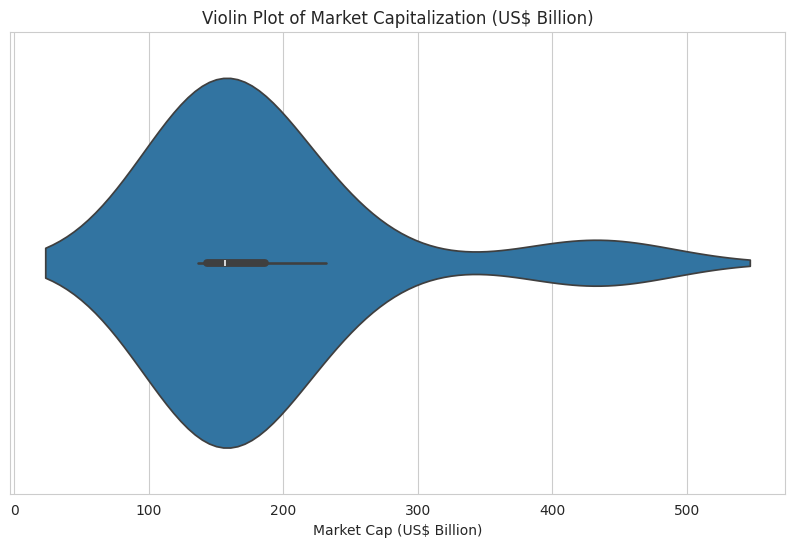

2025-Nov-25-06:24:08 : Plotted Violin Plot of Market Cap Distribution


In [ ]:
# Market Cap Distribution by Quartile
plt.figure(figsize=(10, 6))
sns.violinplot(x=pandas_df['Market_Cap_USD_billion'])
plt.title('Violin Plot of Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.show()

log_progress("Plotted Violin Plot of Market Cap Distribution")

##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

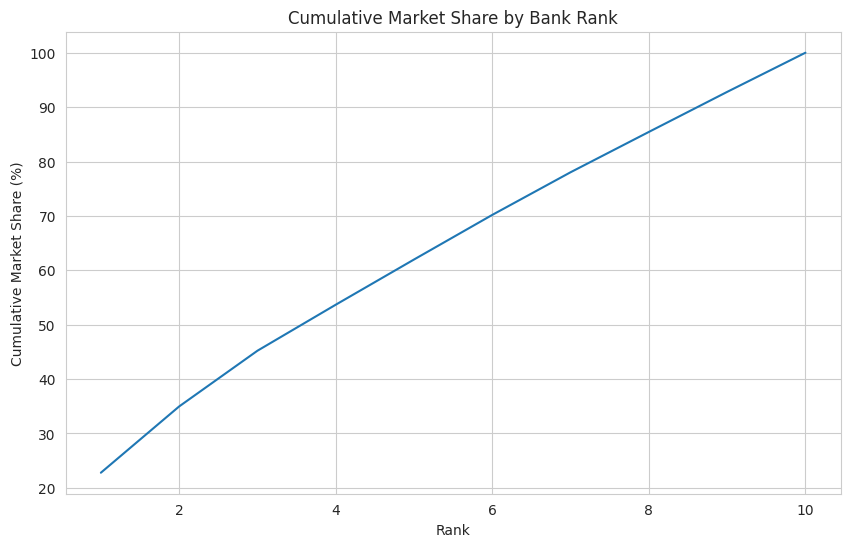

2025-Nov-25-06:24:10 : Plotted Cumulative Market Share


In [ ]:
# Cumulative Market Share

# Plot
total_market_cap = pandas_df['Market_Cap_USD_billion'].sum()
pandas_df['Cumulative_Market_Share'] = pandas_df['Market_Cap_USD_billion'].cumsum() / total_market_cap * 100
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rank', y='Cumulative_Market_Share', data=pandas_df)
plt.title('Cumulative Market Share by Bank Rank')
plt.xlabel('Rank')
plt.ylabel('Cumulative Market Share (%)')
plt.show()

log_progress("Plotted Cumulative Market Share")

##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

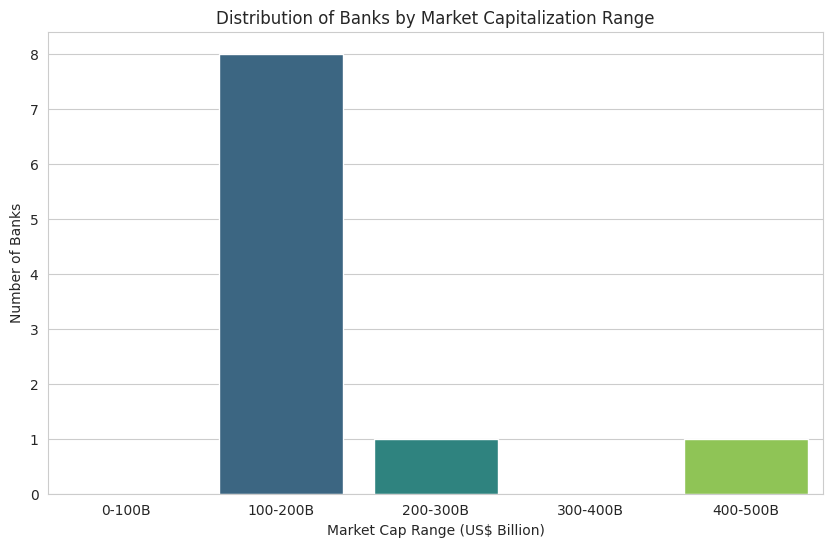

2025-Nov-25-06:24:12 : Plotted Market Cap Range Distribution


In [ ]:
# Market Cap Range Distribution
# Create market cap ranges
bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100B', '100-200B', '200-300B', '300-400B', '400-500B']
pandas_df['Market_Cap_Range'] = pd.cut(pandas_df['Market_Cap_USD_billion'], bins=bins, labels=labels, right=False)
range_counts = pandas_df['Market_Cap_Range'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=range_counts.index, y=range_counts.values, palette='viridis', hue=range_counts.index, legend=False)
plt.title('Distribution of Banks by Market Capitalization Range')
plt.xlabel('Market Cap Range (US$ Billion)')
plt.ylabel('Number of Banks')
plt.show()

log_progress("Plotted Market Cap Range Distribution")

##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

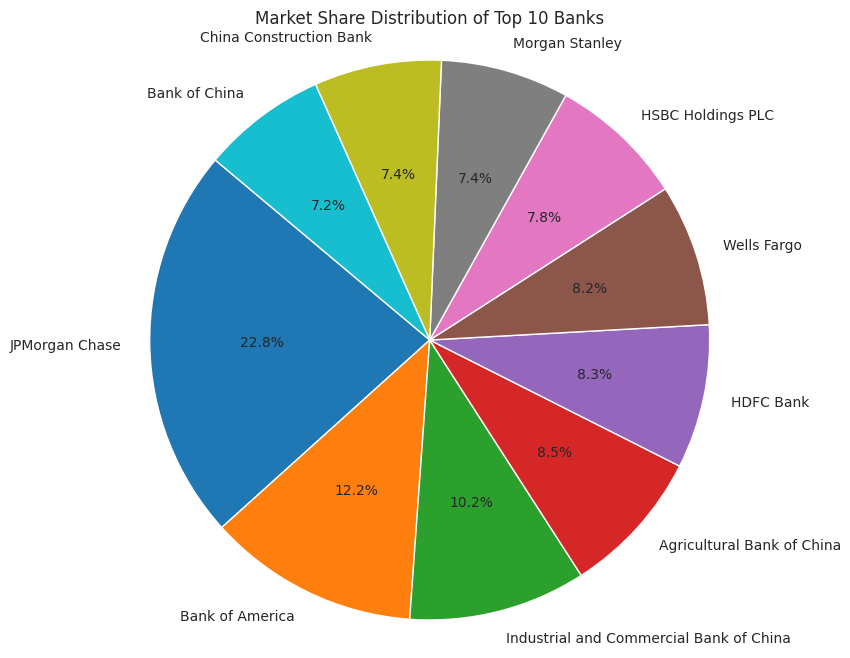

2025-Nov-25-06:24:15 : Plotted Market Share Distribution of Top 10 Banks


In [ ]:
# Top 10 Banks Market Share
# Calculate market share percentage for top 10 banks
total_market_cap_top10 = top_10_banks['Market_Cap_USD_billion'].sum()
top_10_banks['Market_Share_Percentage'] = (top_10_banks['Market_Cap_USD_billion'] / total_market_cap_top10) * 100

# Plot
plt.figure(figsize=(10, 8))
plt.pie(top_10_banks['Market_Share_Percentage'], labels=top_10_banks['Bank_name'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share Distribution of Top 10 Banks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

log_progress("Plotted Market Share Distribution of Top 10 Banks")

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [ ]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [ ]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [ ]:
# Import required functions
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.window import Window

# First, let's rename your columns to match our queries (if needed)

# Create window specifications
window_spec = Window.orderBy(asc("Rank"))

##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [ ]:
# Query: Advanced Market Cap Analysis with Growth Metrics
window_spec = Window.orderBy(asc("Rank"))
market_cap_analysis = spark_df_cleaned.withColumn(
    "Previous_Market_Cap", lag("Market_Cap_USD_billion", 1).over(window_spec)
)
market_cap_analysis = market_cap_analysis.withColumn(
    "Market_Cap_Growth_USD", col("Market_Cap_USD_billion") - col("Previous_Market_Cap")
)
market_cap_analysis = market_cap_analysis.withColumn(
    "Market_Cap_Growth_Pct",
    round((col("Market_Cap_Growth_USD") / col("Previous_Market_Cap")) * 100, 2)
)
print("Advanced Market Capitalization Analysis with Growth Metrics:")
market_cap_analysis.show()

log_progress("Advanced Market Cap Analysis Performed")

Advanced Market Capitalization Analysis with Growth Metrics:
+----+--------------------+----------------------+-------------------+---------------------+---------------------+
|Rank|           Bank_name|Market_Cap_USD_billion|Previous_Market_Cap|Market_Cap_Growth_USD|Market_Cap_Growth_Pct|
+----+--------------------+----------------------+-------------------+---------------------+---------------------+
|   1|      JPMorgan Chase|                432.92|               NULL|                 NULL|                 NULL|
|   2|     Bank of America|                231.52|             432.92|               -201.4|               -46.52|
|   3|Industrial and Co...|                194.56|             231.52|   -36.96000000000001|               -15.96|
|   4|Agricultural Bank...|                160.68|             194.56|  -33.879999999999995|               -17.41|
|   5|           HDFC Bank|                157.91|             160.68|  -2.7700000000000102|                -1.72|
|   6|         Well

##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

In [ ]:
# Market Concentration Analysis
total_market_cap = spark_df_cleaned.agg(sum("Market_Cap_USD_billion")).collect()[0][0]
market_concentration = spark_df_cleaned.withColumn(
    "Market_Share", round((col("Market_Cap_USD_billion") / total_market_cap) * 100, 2)
).withColumn(
    "Cumulative_Market_Share", sum("Market_Share").over(window_spec.rowsBetween(Window.unboundedPreceding, 0))
)
market_concentration = market_concentration.withColumn(
    "Market_Share_Tier",
    when(col("Market_Share") >= 10, "Tier 1 (>= 10%)")
    .when((col("Market_Share") >= 5) & (col("Market_Share") < 10), "Tier 2 (5%-10%)")
    .otherwise("Tier 3 (< 5%)")
)
print("Market Concentration Analysis:")
market_concentration.show()

log_progress("Market Concentration Analysis Performed")

Market Concentration Analysis:
+----+--------------------+----------------------+------------+-----------------------+-----------------+
|Rank|           Bank_name|Market_Cap_USD_billion|Market_Share|Cumulative_Market_Share|Market_Share_Tier|
+----+--------------------+----------------------+------------+-----------------------+-----------------+
|   1|      JPMorgan Chase|                432.92|       22.79|                  22.79|  Tier 1 (>= 10%)|
|   2|     Bank of America|                231.52|       12.19|                  34.98|  Tier 1 (>= 10%)|
|   3|Industrial and Co...|                194.56|       10.24|                  45.22|  Tier 1 (>= 10%)|
|   4|Agricultural Bank...|                160.68|        8.46|                  53.68|  Tier 2 (5%-10%)|
|   5|           HDFC Bank|                157.91|        8.31|                  61.99|  Tier 2 (5%-10%)|
|   6|         Wells Fargo|                155.87|         8.2|                  70.19|  Tier 2 (5%-10%)|
|   7|   HSBC H

##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

In [ ]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis
Q1 = spark_df_cleaned.approxQuantile("Market_Cap_USD_billion", [0.25], 0.05)[0]
Q2 = spark_df_cleaned.approxQuantile("Market_Cap_USD_billion", [0.50], 0.05)[0]
Q3 = spark_df_cleaned.approxQuantile("Market_Cap_USD_billion", [0.75], 0.05)[0]
quartile_analysis = spark_df_cleaned.withColumn(
    "Quartile", ntile(4).over(window_spec)
)
quartile_analysis = quartile_analysis.withColumn("Q1_Value", lit(Q1)) \
                                     .withColumn("Q2_Value", lit(Q2)) \
                                     .withColumn("Q3_Value", lit(Q3))
print("Quartile Distribution Analysis:")
quartile_analysis.show()

log_progress("Completed Quartile Distribution Analysis")

Quartile Distribution Analysis:
+----+--------------------+----------------------+--------+--------+--------+--------+
|Rank|           Bank_name|Market_Cap_USD_billion|Quartile|Q1_Value|Q2_Value|Q3_Value|
+----+--------------------+----------------------+--------+--------+--------+--------+
|   1|      JPMorgan Chase|                432.92|       1|  140.83|  155.87|  194.56|
|   2|     Bank of America|                231.52|       1|  140.83|  155.87|  194.56|
|   3|Industrial and Co...|                194.56|       1|  140.83|  155.87|  194.56|
|   4|Agricultural Bank...|                160.68|       2|  140.83|  155.87|  194.56|
|   5|           HDFC Bank|                157.91|       2|  140.83|  155.87|  194.56|
|   6|         Wells Fargo|                155.87|       2|  140.83|  155.87|  194.56|
|   7|   HSBC Holdings PLC|                 148.9|       3|  140.83|  155.87|  194.56|
|   8|      Morgan Stanley|                140.83|       3|  140.83|  155.87|  194.56|
|   9|China

##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

In [ ]:
# Comparative Size Analysis
stats = spark_df_cleaned.agg(
    min("Market_Cap_USD_billion").alias("Min_Cap"),
    max("Market_Cap_USD_billion").alias("Max_Cap"),
    avg("Market_Cap_USD_billion").alias("Avg_Cap")
).collect()[0]
avg_cap = stats["Avg_Cap"]
size_analysis = spark_df_cleaned.withColumn(
    "Size_Category",
    when(col("Market_Cap_USD_billion") >= avg_cap, "Large Bank")
    .when(col("Market_Cap_USD_billion") >= avg_cap * 0.75, "Mid-Sized Bank")
    .otherwise("Small Bank")
)
print("Comparative Size Analysis:")
size_analysis.show()

log_progress("Completed Comparative Size Analysis")

Comparative Size Analysis:
+----+--------------------+----------------------+--------------+
|Rank|           Bank_name|Market_Cap_USD_billion| Size_Category|
+----+--------------------+----------------------+--------------+
|   1|      JPMorgan Chase|                432.92|    Large Bank|
|   2|     Bank of America|                231.52|    Large Bank|
|   3|Industrial and Co...|                194.56|    Large Bank|
|   4|Agricultural Bank...|                160.68|Mid-Sized Bank|
|   5|           HDFC Bank|                157.91|Mid-Sized Bank|
|   6|         Wells Fargo|                155.87|Mid-Sized Bank|
|   7|   HSBC Holdings PLC|                 148.9|Mid-Sized Bank|
|   8|      Morgan Stanley|                140.83|    Small Bank|
|   9|China Constructio...|                139.82|    Small Bank|
|  10|       Bank of China|                136.81|    Small Bank|
+----+--------------------+----------------------+--------------+



##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

In [ ]:
# Growth and Gap Analysis
growth_gap = spark_df_cleaned.withColumn(
    "Previous_Market_Cap", lag("Market_Cap_USD_billion", 1).over(window_spec)
).withColumn(
    "Market_Cap_Gap_USD",
    col("Market_Cap_USD_billion") - col("Previous_Market_Cap")
).withColumn(
    "Gap_Percentage",
    round((col("Market_Cap_Gap_USD") / col("Previous_Market_Cap")) * 100, 2)
)
print("Market Growth and Gap Analysis Between Consecutive Banks:")
growth_gap.show()
log_progress("Completed Market Growth & Gap Analysis")

Market Growth and Gap Analysis Between Consecutive Banks:
+----+--------------------+----------------------+-------------------+-------------------+--------------+
|Rank|           Bank_name|Market_Cap_USD_billion|Previous_Market_Cap| Market_Cap_Gap_USD|Gap_Percentage|
+----+--------------------+----------------------+-------------------+-------------------+--------------+
|   1|      JPMorgan Chase|                432.92|               NULL|               NULL|          NULL|
|   2|     Bank of America|                231.52|             432.92|             -201.4|        -46.52|
|   3|Industrial and Co...|                194.56|             231.52| -36.96000000000001|        -15.96|
|   4|Agricultural Bank...|                160.68|             194.56|-33.879999999999995|        -17.41|
|   5|           HDFC Bank|                157.91|             160.68|-2.7700000000000102|         -1.72|
|   6|         Wells Fargo|                155.87|             157.91| -2.039999999999992|    

##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

In [ ]:
# Market Dominance Analysis
total_cap = spark_df_cleaned.agg(sum("Market_Cap_USD_billion")).collect()[0][0]
dominance = spark_df_cleaned.withColumn(
    "Market_Share",
    round((col("Market_Cap_USD_billion") / total_cap) * 100, 2)
)
dominance = dominance.withColumn(
    "Cumulative_Dominance",
    sum("Market_Share").over(window_spec.rowsBetween(Window.unboundedPreceding, 0))
)
print("Market Dominance Analysis:")
dominance.show()

log_progress("Completed Market Dominance Analysis")

Market Dominance Analysis:
+----+--------------------+----------------------+------------+--------------------+
|Rank|           Bank_name|Market_Cap_USD_billion|Market_Share|Cumulative_Dominance|
+----+--------------------+----------------------+------------+--------------------+
|   1|      JPMorgan Chase|                432.92|       22.79|               22.79|
|   2|     Bank of America|                231.52|       12.19|               34.98|
|   3|Industrial and Co...|                194.56|       10.24|               45.22|
|   4|Agricultural Bank...|                160.68|        8.46|               53.68|
|   5|           HDFC Bank|                157.91|        8.31|               61.99|
|   6|         Wells Fargo|                155.87|         8.2|               70.19|
|   7|   HSBC Holdings PLC|                 148.9|        7.84|               78.03|
|   8|      Morgan Stanley|                140.83|        7.41|               85.44|
|   9|China Constructio...|           

##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

In [ ]:
# Segment Performance Analysis
segment_analysis = spark_df_cleaned.withColumn(
    "Market_Cap_Segment",
    when(col("Market_Cap_USD_billion") < 150, "Low (0 - 150B)")
    .when((col("Market_Cap_USD_billion") >= 150) & (col("Market_Cap_USD_billion") < 250),
          "Medium (150B - 250B)")
    .otherwise("High (250B+)")
)
segment_counts = segment_analysis.groupBy("Market_Cap_Segment").count()
print("Segment-wise Performance Analysis:")
segment_counts.show()

log_progress("Completed Segment-wise Performance Analysis")


Segment-wise Performance Analysis:
+--------------------+-----+
|  Market_Cap_Segment|count|
+--------------------+-----+
|        High (250B+)|    1|
|Medium (150B - 250B)|    5|
|      Low (0 - 150B)|    4|
+--------------------+-----+



##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

In [ ]:
# Comprehensive Performance Dashboard
dashboard = spark_df_cleaned \
    .withColumn("Market_Share", round((col("Market_Cap_USD_billion") / total_cap) * 100, 2)) \
    .withColumn("Cumulative_Share", sum("Market_Share").over(window_spec)) \
    .withColumn("Previous_Cap", lag("Market_Cap_USD_billion").over(window_spec)) \
    .withColumn("Gap_USD", col("Market_Cap_USD_billion") - col("Previous_Cap")) \
    .withColumn("Quartile", ntile(4).over(window_spec)) \
    .withColumn(
        "Size_Category",
        when(col("Market_Cap_USD_billion") >= avg_cap, "Large Bank")
        .when(col("Market_Cap_USD_billion") >= avg_cap * 0.75, "Mid-Sized Bank")
        .otherwise("Small Bank")
    )
print("Comprehensive Performance Dashboard:")
dashboard.show()

log_progress("Comprehensive Performance Dashboard Generated")

Comprehensive Performance Dashboard:
+----+--------------------+----------------------+------------+----------------+------------+-------------------+--------+--------------+
|Rank|           Bank_name|Market_Cap_USD_billion|Market_Share|Cumulative_Share|Previous_Cap|            Gap_USD|Quartile| Size_Category|
+----+--------------------+----------------------+------------+----------------+------------+-------------------+--------+--------------+
|   1|      JPMorgan Chase|                432.92|       22.79|           22.79|        NULL|               NULL|       1|    Large Bank|
|   2|     Bank of America|                231.52|       12.19|           34.98|      432.92|             -201.4|       1|    Large Bank|
|   3|Industrial and Co...|                194.56|       10.24|           45.22|      231.52| -36.96000000000001|       1|    Large Bank|
|   4|Agricultural Bank...|                160.68|        8.46|           53.68|      194.56|-33.879999999999995|       2|Mid-Sized Ban

#5. Visualization Integration

In [ ]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
# 2. Generate Tableau connection instructions

# 3. Generate Power BI connection instructions

# 4. Execute visualization setup
# 5. Sample Dashboard Layout (Documentation)
